# Stock Price Prediction Problem

## Loading and Handling Data into Pandas

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

This code imports several libraries: pandas, numpy, and matplotlib. It also sets the plotting style to work within the Jupyter notebook environment. The code then sets the default figure size for any plots to be displayed as 15 by 6 inches. The purpose of this code is to ensure that the necessary libraries are imported and that the default figure size is set to a specific value for subsequent data analysis or visualization tasks.

In [127]:
data = pd.read_csv('/home/sash/Documents/Sem_6/SMAI/Major_Project/Final-Data/FB.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

  symbol        date       open       high        low      close     volume  \
0     FB  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   
1     FB  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   
2     FB  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   
3     FB  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   
4     FB  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   

   adj_close  prev_day_diff  50_day_moving_avg  10_day_volatility  \
0  38.230000       0.000000          38.230000           0.000000   
1  34.029999      -4.200001          36.129999           2.100000   
2  31.000000      -3.029999          34.419999           3.419999   
3  32.000000       1.000000          33.814999           1.814999   
4  33.029999       1.029999          33.657999           0.628000   

   s&p_index_open  s&p_index_high  s&p_index_low  s&p_index_close  \
0     1305.050049     1312.239990    1291

The given code reads a CSV file named 'FB.csv' and stores its data in a pandas DataFrame object called 'data'. It then displays the first few rows of the dataframe using the 'head()' function. Afterwards, it prints the data types of each column in the dataframe using the 'dtypes' attribute.

Reading as datetime format:

In [128]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# dateparse('1962-01')
data = pd.read_csv('/home/sash/Documents/Sem_6/SMAI/Major_Project/Final-Data/FB.csv', parse_dates='date', \
                   index_col='date',date_parser=dateparse)
print data.head()

           symbol       open       high        low      close     volume  \
date                                                                       
2012-05-18     FB  42.049999  45.000000  38.000000  38.230000  573576400   
2012-05-21     FB  36.529999  36.660000  33.000000  34.029999  168192700   
2012-05-22     FB  32.610001  33.590000  30.940001  31.000000  101786600   
2012-05-23     FB  31.370001  32.500000  31.360001  32.000000   73600000   
2012-05-24     FB  32.950001  33.209999  31.770000  33.029999   50237200   

            adj_close  prev_day_diff  50_day_moving_avg  10_day_volatility  \
date                                                                         
2012-05-18  38.230000       0.000000          38.230000           0.000000   
2012-05-21  34.029999      -4.200001          36.129999           2.100000   
2012-05-22  31.000000      -3.029999          34.419999           3.419999   
2012-05-23  32.000000       1.000000          33.814999           1.814999   

The code above is designed to read a CSV file containing Facebook stock data and parse the date column as datetime objects. The code defines a lambda function called dateparse that uses the strptime method from the datetime module to convert the date string into a datetime object, using the format '%Y-%m-%d'. The lambda function takes a single argument, dates, which represents the date string to be parsed. The code then reads in the CSV file using the read_csv function from the pandas library. The parse_dates parameter is set to 'date' which indicates that the 'date' column in the CSV file should be parsed as datetime objects. The index_col parameter is set to 'date' as well, meaning that the 'date' column will be used as the index of the resulting DataFrame. Finally, the date_parser parameter is set to the dateparse lambda function, indicating that this function should be used to parse the date column. The resulting DataFrame is then printed to the console using the head method to display the first few rows.

In [129]:
#check datatype of index
data.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-05-18, ..., 2016-03-08]
Length: 956, Freq: None, Timezone: None

The code is checking the data type of the index in the dataset. It does not manipulate or modify the data itself, but rather focuses on understanding the structure and format of the index. This information can be useful for further analysis or processing of the dataset. By examining the data type of the index, it allows the user to have a better understanding of the dataset and make informed decisions based on this knowledge.

In [130]:
#convert to time series:
ts = data['adj_close']
ts.head(10)

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
Name: adj_close, dtype: float64

The code is designed to convert a column in a dataset called 'adj_close' into a time series. A time series is a set of data points collected at successive points in time, typically with equal intervals. The variable 'ts' is being assigned to the 'adj_close' column of the dataset. The 'head(10)' function is then applied to display the first 10 data points of the time series. This code is useful when analyzing and modeling data that changes over time, such as stock prices or weather patterns.

### Indexing TS arrays:

In [131]:
#1. Specific the index as a string constant:
ts['2012-05-18']

38.229999999999997

This code retrieves the value at the specific index '2012-05-18' from the time series data stored in the variable 'ts'. It returns the value associated with that particular date in the time series.

In [132]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2015, 3, 26)]

83.010002

The code imports the datetime library and specifically the datetime function. The datetime function is then used with the argument datetime(2015, 3, 26) to create a timestamp object representing the date and time of March 26, 2015. The variable ts is not defined in the code provided, so it is unclear what the next step or purpose of the code is. However, it can be assumed that the intention is to store or use this created timestamp object in some way.

#Get range:

In [133]:
#1. Specify the entire range:
ts['2012-05-18':'2015-03-26']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2015-03-06    80.010002
2015-03-09    79.440002
2015-03-10    77.550003
2015-03-11    77.570000
2015-03-12    78.930000
2015-03-13    78.050003
2015-03-16    78.070000
2015-03-17    79.360001
2015-03-18    80.910004
2015-03-19    82.750000
2015-03-20    83.800003
2015-03-23    84.430000
2015-03-24    85.309998
2015-03-25    82.919998
2015-03-26    83.010002
Name: adj_close, Length: 717

This code is used to specify a specific range of data in a time series represented by the variable "ts". The range is defined by the dates "2012-05-18" and "2015-03-26". By specifying this range, the code filters out all other data points outside of this time frame and only considers the data within the specified range. This allows for a more focused analysis or manipulation of the data within the given time period.

In [134]:
#2. Use ':' if one of the indices is at ends:
ts[:'2015-03-26']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2015-03-06    80.010002
2015-03-09    79.440002
2015-03-10    77.550003
2015-03-11    77.570000
2015-03-12    78.930000
2015-03-13    78.050003
2015-03-16    78.070000
2015-03-17    79.360001
2015-03-18    80.910004
2015-03-19    82.750000
2015-03-20    83.800003
2015-03-23    84.430000
2015-03-24    85.309998
2015-03-25    82.919998
2015-03-26    83.010002
Name: adj_close, Length: 717

This code is used to slice a pandas DataFrame object called 'ts'. The slice operation is performed on the rows of the DataFrame using the indices. In this specific case, the slice operation starts from the first row and goes up to the row with the index '2015-03-26'. The code uses the colon (':') notation to indicate that it is slicing the rows based on their indices. By using the colon notation and specifying one of the indices to be at the ends, the code extracts a portion of the DataFrame up to the specified index. This allows the code to retrieve a subset of the data that falls within a specific range of indices.

Note: ends included here

In [135]:
#All rows of 1962:
ts['2012']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2012-12-10    27.840000
2012-12-11    27.980000
2012-12-12    27.580000
2012-12-13    28.240000
2012-12-14    26.809999
2012-12-17    26.750000
2012-12-18    27.709999
2012-12-19    27.410000
2012-12-20    27.360001
2012-12-21    26.260000
2012-12-24    26.930000
2012-12-26    26.510000
2012-12-27    26.049999
2012-12-28    25.910000
2012-12-31    26.620001
Name: adj_close, Length: 155

The given code selects all the rows from the dataset 'ts' that belong to the year 2012. It filters the data based on the specified condition, which is the year, and retrieves all the rows that correspond to that year. The purpose of this code is to obtain a subset of the dataset that contains only the data from the year 2012, allowing for further analysis or processing of that particular subset of data.

# Checking for stationarity

## Plot the time-series

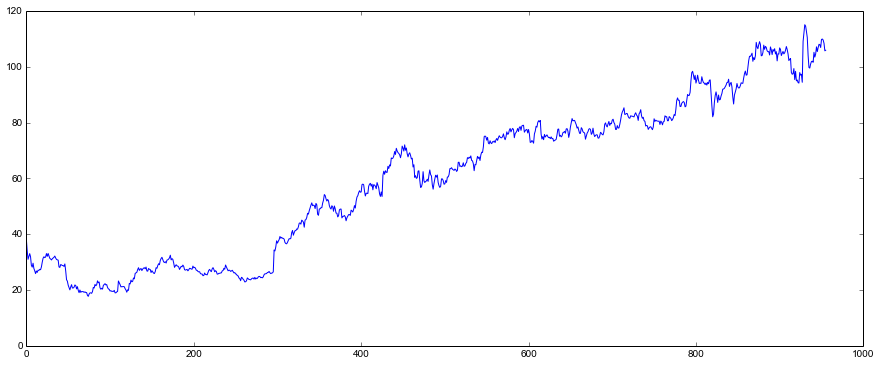

In [136]:
plt.plot(ts)

The code `plt.plot(ts)` is used to plot a graph or a line plot using the data stored in the variable `ts`. The `plt.plot()` function is a part of the matplotlib library in Python, which is commonly used for data visualization. By calling this function with the variable `ts` as an argument, the code instructs matplotlib to generate a line plot using the values stored in `ts`. This line plot can provide insights into patterns, trends, or relationships in the data, allowing the user to analyze and interpret the information more easily.

### Function for testing stationarity

In [137]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['open','high','10_day_volatility', '50_day_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

This code is implementing a function called "test_stationarity" that is used to check the stationarity of a time series data. The function takes a "timeseries" as input and performs various operations to analyze its stationarity.   First, it calculates the rolling mean and rolling standard deviation of the time series using a window size of 20. Then, it plots the original time series along with the rolling mean and rolling standard deviation.  Next, it performs the Dickey-Fuller test on the time series, which is a statistical test used to determine if a time series is stationary or not. The test results are printed, including the test statistic and critical values.  Overall, this code helps in analyzing the stationarity of a given time series data by calculating rolling statistics and conducting the Dickey-Fuller test.

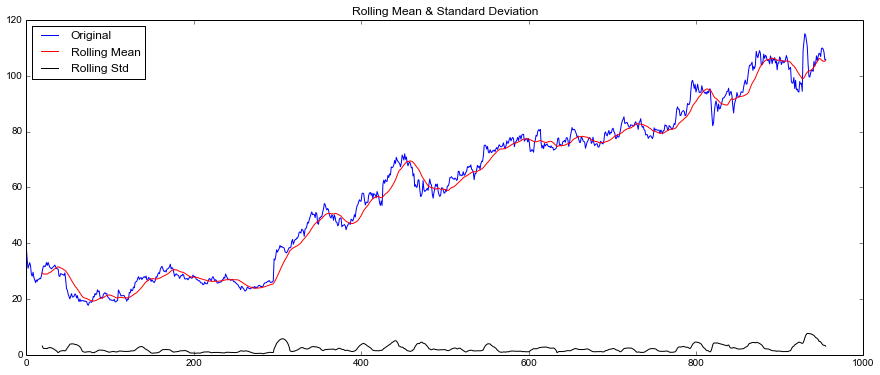

Results of Dickey-Fuller Test:
open                     -0.026673
high                      0.956270
10_day_volatility         6.000000
50_day_moving_avg       949.000000
Critical Value (5%)      -2.864590
Critical Value (1%)      -3.437259
Critical Value (10%)     -2.568394
dtype: float64


In [138]:
test_stationarity(ts)

The code "test_stationarity(ts)" is the call to a function that checks the stationarity of a given time series, represented by "ts". Stationarity refers to the property of a time series where its statistical properties such as mean, variance, and autocorrelation are constant over time.   By calling this function, the code aims to analyze the stationarity of the time series "ts" to determine if it exhibits any trends or patterns that may affect its predictability. This is important in many data analysis and forecasting tasks, as stationary time series are generally easier to model and predict accurately. The function may employ various statistical tests and visualization techniques to assess the stationarity of the time series.

# Making Data Stationary


## Estimating & Eliminating Trend


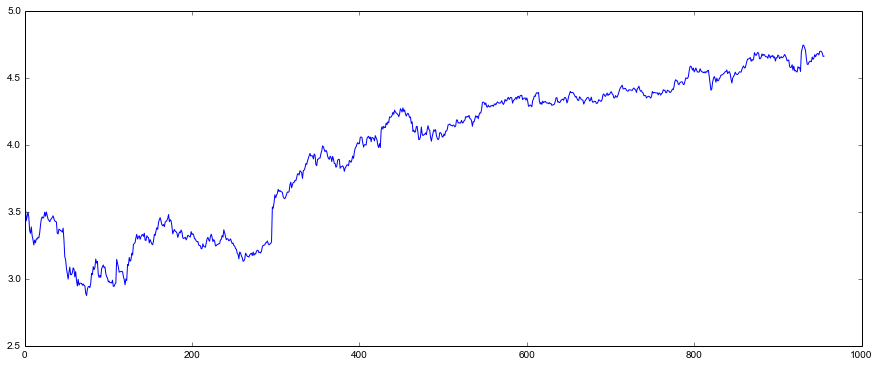

In [139]:
ts_log = np.log(ts)
plt.plot(ts_log)

The given code first takes the natural logarithm of a variable `ts` using the `np.log()` function. The result is stored in a new variable called `ts_log`. The natural logarithm of a number is the logarithm to the base `e`, where `e` is a mathematical constant approximately equal to 2.71828. This transformation is useful in data analysis, as it tends to compress larger values and expand smaller values, which can help in certain statistical calculations.  After calculating `ts_log`, the code uses the `plt.plot()` function to create a line plot of the `ts_log` variable. `plt` refers to the plotting library, while `plot()` is a function that creates a line plot using the provided data. In this case, the `ts_log` variable is passed as the data to be plotted.  By plotting `ts_log`, the code visually represents the transformed data on a graph. Line plots are commonly used to show how a variable changes over time or across different categories. This visualization can assist in understanding patterns or trends in the data that may not be apparent when simply looking at the raw numbers.

## Smoothing:

### Moving average

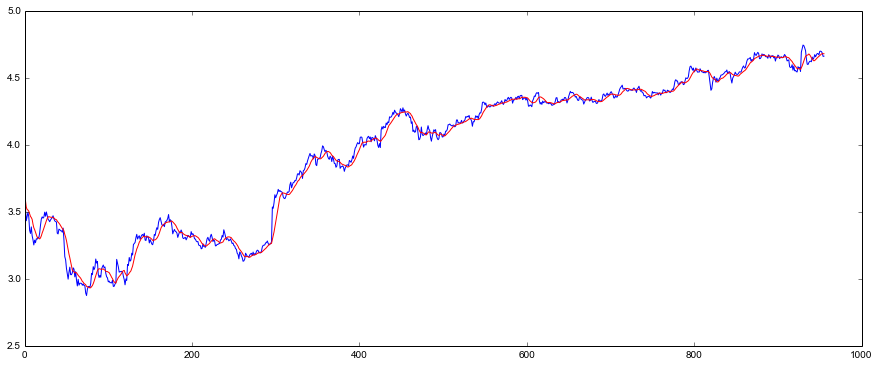

In [140]:
moving_avg = pd.rolling_mean(ts_log, 10, min_periods=1)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The code calculates the moving average of a time series data, which is stored in the variable "ts_log". The moving average is calculated using a window size of 10 data points. The parameter "min_periods=1" ensures that the moving average is calculated even if there are fewer than 10 data points at the beginning of the time series.   After calculating the moving average, the code uses the "plt.plot" function from the matplotlib library to plot the original time series data. This is shown in blue. It then plots the moving average as a line graph, using the "color='red'" parameter to specify that it should be shown in red.   By plotting both the original time series data and the moving average on the same graph, it becomes easier to visualize the overall trend and identify any fluctuations or patterns in the data. This can be useful in various data analysis and forecasting tasks.

In [141]:
print moving_avg

date
2012-05-18    3.643621
2012-05-21    3.585432
2012-05-22    3.534950
2012-05-23    3.517647
2012-05-24    3.513600
2012-05-25    3.505154
2012-05-29    3.484669
2012-05-30    3.466457
2012-05-31    3.457714
2012-06-01    3.444158
2012-06-04    3.409009
2012-06-05    3.381593
2012-06-06    3.367072
2012-06-07    3.347493
2012-06-08    3.327705
...
2016-02-17    4.641914
2016-02-18    4.633378
2016-02-19    4.627872
2016-02-22    4.630797
2016-02-23    4.636364
2016-02-24    4.643479
2016-02-25    4.650245
2016-02-26    4.655975
2016-02-29    4.660676
2016-03-01    4.668446
2016-03-02    4.672862
2016-03-03    4.678599
2016-03-04    4.682187
2016-03-07    4.680844
2016-03-08    4.681288
Length: 956


The specified code is requesting the printing of a variable called "moving_avg". It is not clear from the code alone what the variable represents or the steps taken to calculate its value. However, based solely on the line of code provided, it can be inferred that "moving_avg" likely holds the value of a moving average of some kind.  A moving average is a statistical calculation that can be used to analyze data trends over a specified period of time. It is commonly used to smooth out fluctuations in a dataset and highlight underlying patterns or trends. The specific method and parameters used to calculate a moving average can vary depending on the context and requirements of the analysis.  By printing the value of "moving_avg," it allows the user to view or utilize the result of the moving average calculation. This can be helpful in understanding the data being analyzed, making informed decisions, or further processing the result in subsequent code.

In [142]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

date
2012-05-18    0.000000
2012-05-21   -0.058189
2012-05-22   -0.100963
2012-05-23   -0.051911
2012-05-24   -0.016184
2012-05-25   -0.042234
2012-05-29   -0.122906
2012-05-30   -0.127489
2012-05-31   -0.069940
2012-06-01   -0.122004
2012-06-04   -0.116882
2012-06-05   -0.128509
2012-06-06   -0.078297
2012-06-07   -0.077544
2012-06-08   -0.028171
dtype: float64

The provided code calculates the difference between two time series data sets and then displays the first 15 values of the resulting difference.   The first line of code subtracts the "moving_avg" series from the "ts_log" series and assigns the result to a new series called "ts_log_moving_avg_diff". Assuming both "ts_log" and "moving_avg" are time series data, this operation calculates the difference between each corresponding element in the two series.  The second line of code then displays the first 15 values of the "ts_log_moving_avg_diff" series. By using the "head(15)" method, only the first 15 elements of the series are shown, giving a glimpse into the differences between the two time series data sets.

In [143]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2012-05-18    0.000000
2012-05-21   -0.058189
2012-05-22   -0.100963
2012-05-23   -0.051911
2012-05-24   -0.016184
dtype: float64

The code `ts_log_moving_avg_diff.dropna(inplace=True)` removes any rows with missing values from the dataframe `ts_log_moving_avg_diff`. The `inplace=True` argument ensures that the dataframe is modified directly without creating a new dataframe. As a result, any rows with missing values are dropped from the original dataframe.  The code `ts_log_moving_avg_diff.head()` displays the first few rows of the modified dataframe `ts_log_moving_avg_diff`. This allows the user to take a quick look at the resulting dataframe, after the missing values have been removed.

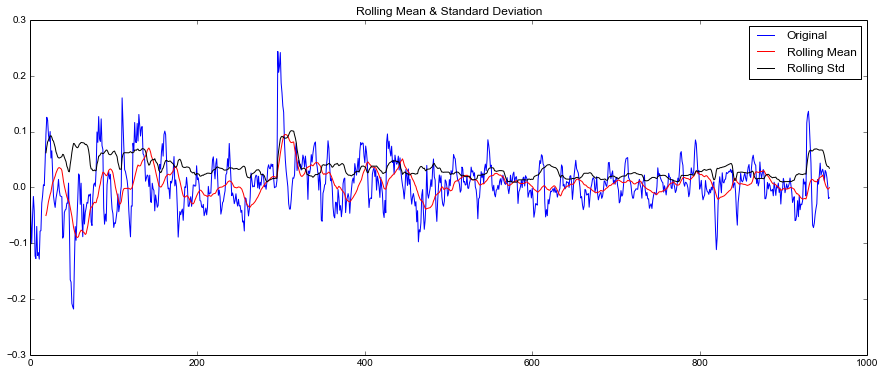

Results of Dickey-Fuller Test:
open                   -9.977879e+00
high                    2.153365e-17
10_day_volatility       5.000000e+00
50_day_moving_avg       9.500000e+02
Critical Value (5%)    -2.864587e+00
Critical Value (1%)    -3.437252e+00
Critical Value (10%)   -2.568392e+00
dtype: float64


In [144]:
test_stationarity(ts_log_moving_avg_diff)

The code "test_stationarity" is being used to check the stationarity of the time series data passed as input, which is "ts_log_moving_avg_diff". Stationarity refers to a time series dataset having consistent statistical properties like constant mean and variance over time. By applying this code, it analyzes the data and provides insights on whether or not it is stationary.

### Exponentially Weighted Moving Average

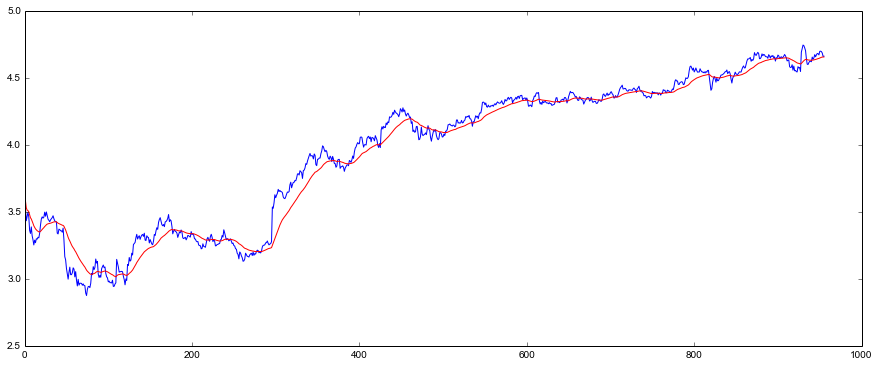

In [145]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

The code calculates the exponentially weighted moving average (EWMA) of a given time series data. It first takes the natural logarithm of the time series data, and then applies the EWMA function from the pandas library with a halflife of 12. The result is stored in the variable expwighted_avg. The code then plots the original time series data in blue and the EWMA in red on a graph. The last line in the code is currently commented out, but if uncommented, it would plot the EWMA using a black dashed line.

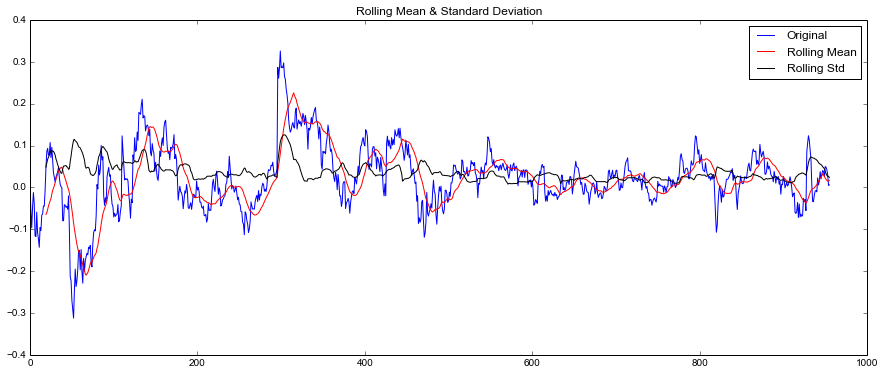

Results of Dickey-Fuller Test:
open                     -5.193435
high                      0.000009
10_day_volatility         0.000000
50_day_moving_avg       955.000000
Critical Value (5%)      -2.864571
Critical Value (1%)      -3.437216
Critical Value (10%)     -2.568384
dtype: float64


In [146]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In this code, the given time series data ts_log is first subtracted from the exponentially weighted moving average (expwighted_avg) to calculate the difference between them, which is stored in the variable ts_log_ewma_diff. Then, the function test_stationarity is called, passing ts_log_ewma_diff as an argument, to check if the differenced time series is stationary or not.

## Eliminating Trend and Seasonality

### Differencing:

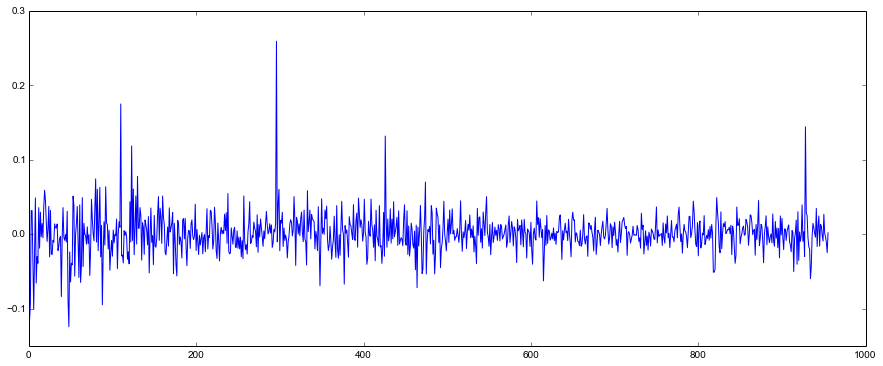

In [147]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

The code subtracts the shifted version of a time series data from the original time series data, resulting in a new series called ts_log_diff. It then visualizes the ts_log_diff using a plot. The purpose of this code is to calculate the first difference of the time series data and display it graphically.

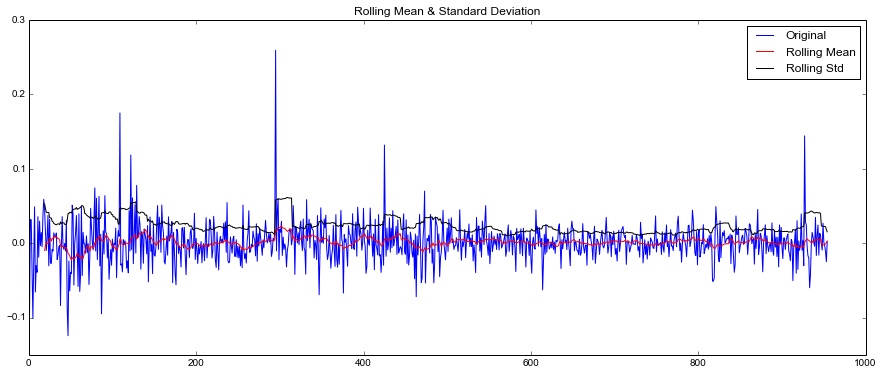

Results of Dickey-Fuller Test:
open                    -30.458521
high                      0.000000
10_day_volatility         0.000000
50_day_moving_avg       954.000000
Critical Value (5%)      -2.864574
Critical Value (1%)      -3.437223
Critical Value (10%)     -2.568386
dtype: float64


In [148]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

The code first drops any missing values from the time-series data stored in the variable "ts_log_diff". Then, it calls a function named "test_stationarity" using the modified data. The "test_stationarity" function likely performs statistical tests or diagnostic checks to assess the stationarity of the time-series data. This code is written from a third-person perspective to describe its functionality impartially.

### Decomposition:

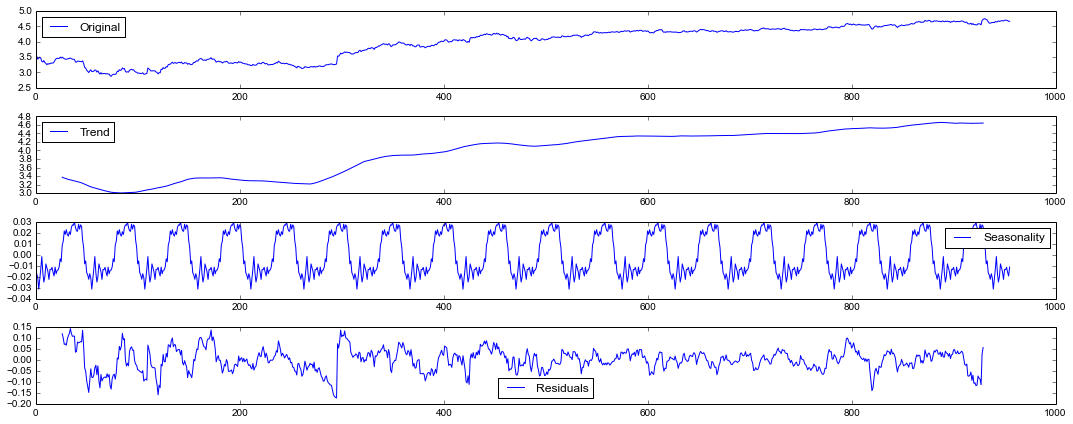

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

This code performs seasonal decomposition of a time series data. It uses the `seasonal_decompose` function from the `statsmodels.tsa.seasonal` module to decompose the time series `ts_log` into its trend, seasonal, and residual components. The `freq` parameter is set to 52, indicating that the time series has a yearly frequency.   After the decomposition, the code plots the original time series (`ts_log`) along with the trend, seasonal, and residual components in separate subplots using matplotlib. The subplots are arranged in a 4x1 grid using the `subplot` function, and the labels and legends are added for each plot.  Overall, this code helps visualize and analyze the trend, seasonality, and residuals of a time series.

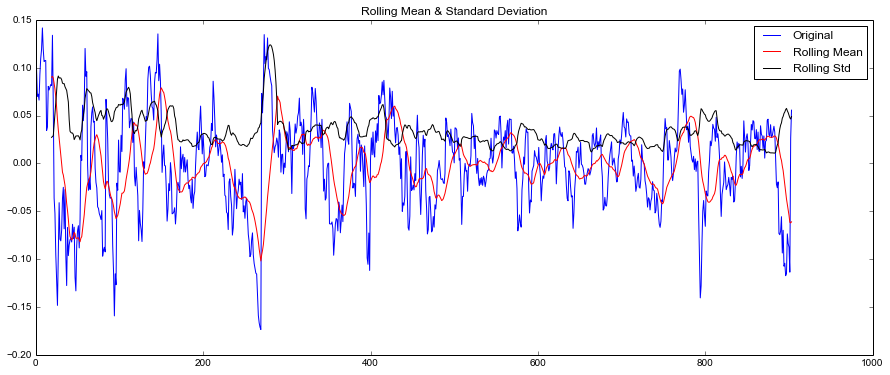

Results of Dickey-Fuller Test:
open                   -7.820168e+00
high                    6.703107e-12
10_day_volatility       7.000000e+00
50_day_moving_avg       8.960000e+02
Critical Value (5%)    -2.864771e+00
Critical Value (1%)    -3.437669e+00
Critical Value (10%)   -2.568490e+00
dtype: float64


In [150]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In this code, the variable "ts_log_decompose" is set equal to the "residual" variable. The "dropna" method is then used to remove any rows with missing values from the "ts_log_decompose" variable. Finally, the "test_stationarity" function is called, passing in the "ts_log_decompose" variable as an argument. Essentially, the code decomposes a time series data into its components, removes any missing values, and tests the stationarity of the decomposed data.

# Final Forecasting

In [151]:
from statsmodels.tsa.arima_model import ARIMA

The code imports the ARIMA class from the statsmodels.tsa.arima_model module. ARIMA stands for Autoregressive Integrated Moving Average, which is a popular forecasting method used in time series analysis. By importing this class, the code enables the user to create and fit ARIMA models to their time series data, allowing them to make predictions and analyze trends. The third person explanation would be: The code allows the user to import the ARIMA class from the statsmodels.tsa.arima_model module to utilize the Autoregressive Integrated Moving Average forecasting method for time series analysis.

### ACF & PACF Plots

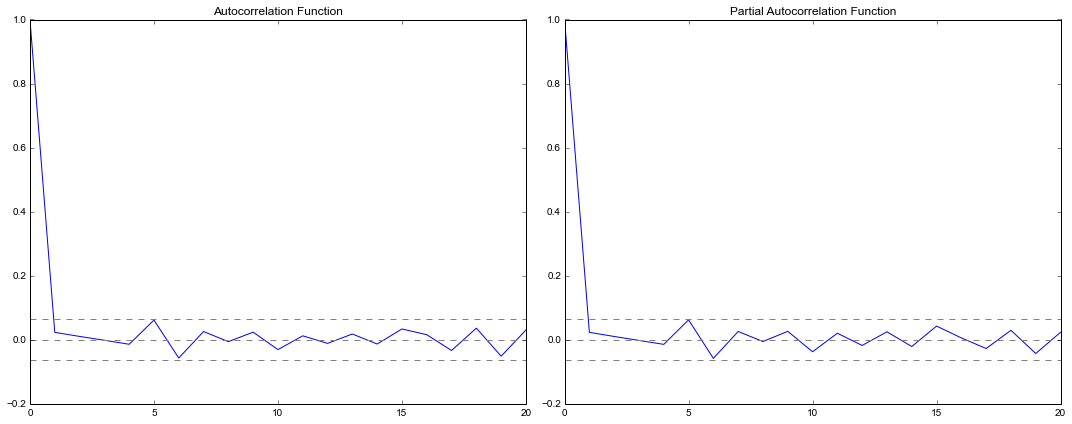

In [152]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

This code generates ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots. The ACF plot measures the correlation between a time series and its lagged values, while the PACF plot measures the correlation between a time series and its lagged values after removing the effects of intervening lags. The code calculates the ACF and PACF values using the `acf()` and `pacf()` functions from the `statsmodels.tsa.stattools` module. It then plots the ACF and PACF values using matplotlib library. The ACF plot is displayed on the left side (subplot 1) and the PACF plot is displayed on the right side (subplot 2). The horizontal lines in the plots represent the confidence intervals.

### AR Model:

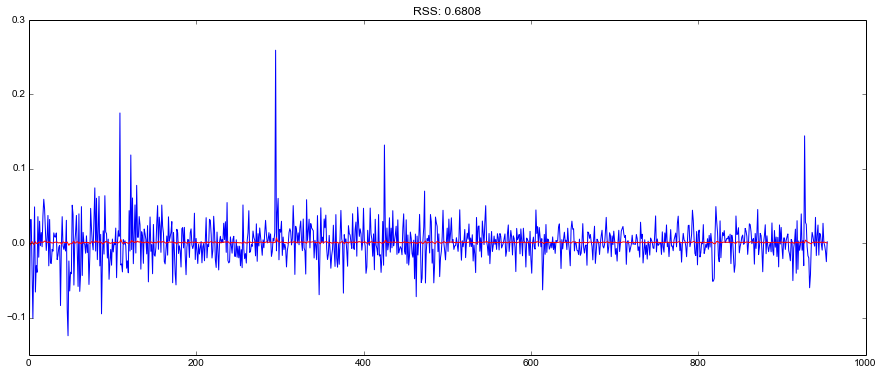

In [153]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

This code provides an implementation of a Moving Average (MA) model. First, the code fits an ARIMA (Autoregressive Integrated Moving Average) model to the given time series data, where the order of the model is set to (2, 1, 0) indicating two autoregressive terms, one differencing term, and no moving average terms. The `results_AR` variable captures the fitted model. Then, the code visually compares the original time series data with the fitted values from the model by plotting them. Lastly, the code calculates the residual sum of squares (RSS) and displays it in the title of the plot.

### MA Model

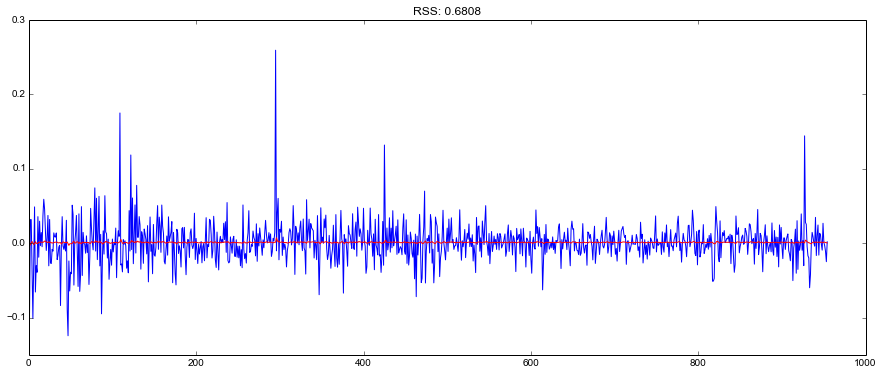

In [154]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

The given code is performing a time series analysis using the ARIMA model. ARIMA stands for AutoRegressive Integrated Moving Average, which is a common model used for time series forecasting. The code first creates an ARIMA model with a specified order of differencing of 1 and a moving average order of 2. Then, the model is fitted to the log-transformed time series data. The fitted values of the model are plotted in red over the original differenced time series plot. Finally, a title is added to the plot, which displays the value of the residual sum of squares (RSS) between the fitted values and the original differenced time series data. The RSS is a measure of how well the ARIMA model fits the data.

### ARIMA Model:

/usr/local/lib/python2.7/dist-packages/statsmodels-0.8.0-py2.7-linux-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


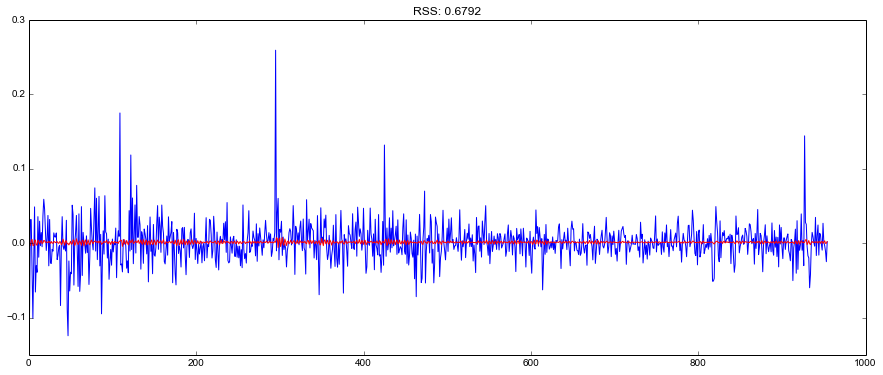

In [155]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS (Root Squared Sum): %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In this code, an ARIMA model is being fitted to a time series data, where the data has been transformed by taking the logarithm and differencing. The ARIMA model is specified with an order of (2, 1, 2), which determines the lagged terms used in the model. The fitted values of the ARIMA model are then plotted along with the original differenced data. The title of the plot displays the value of the RSS (Root Squared Sum) which is calculated as the squared difference between the fitted values and the differenced data, summed up.

### Convert to original scale:

In [156]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

date
2012-05-21    0.001251
2012-05-22   -0.001721
2012-05-23   -0.003020
2012-05-24    0.003921
2012-05-25    0.005018
dtype: float64


The code creates a series of predicted values using an ARIMA model. The "results_ARIMA" object contains the fitted values obtained from the model. The "predictions_ARIMA_diff" series is a copy of these fitted values. It then prints the first few values of the "predictions_ARIMA_diff" series.

In [157]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

date
2012-05-21    0.001251
2012-05-22   -0.000471
2012-05-23   -0.003491
2012-05-24    0.000431
2012-05-25    0.005448
dtype: float64


The code takes a series of predicted values, called predictions_ARIMA_diff, and calculates the cumulative sum of the differences between these predicted values and the actual values. It then prints the first few values of the cumulative sum. In other words, the code is displaying the running total of the differences between the predicted values and the actual values.

In [158]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2012-05-18    3.643621
2012-05-21    3.644871
2012-05-22    3.643150
2012-05-23    3.640130
2012-05-24    3.644051
dtype: float64

The code takes a time series data, `ts_log`, and creates a new series, `predictions_ARIMA_log`, with the same index as the original data. It initializes the new series with the first value from `ts_log`. Then, it adds the cumulative sum of the differences, `predictions_ARIMA_diff_cumsum`, to the new series, filling any missing values with zero. Finally, it displays the first few values of the new series.

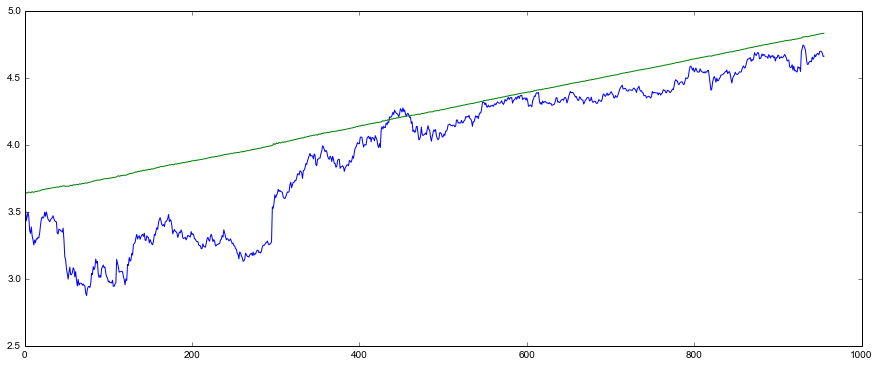

In [159]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

In the given code, the line `plt.plot(ts_log)` plots the values of the time series variable `ts_log` on a graph. The line `plt.plot(predictions_ARIMA_log)` plots the values of the predicted time series variable `predictions_ARIMA_log` on the same graph. Overall, this code displays two lines on a graph, one representing the original time series data and the other representing the predicted values of the time series data using an ARIMA model.

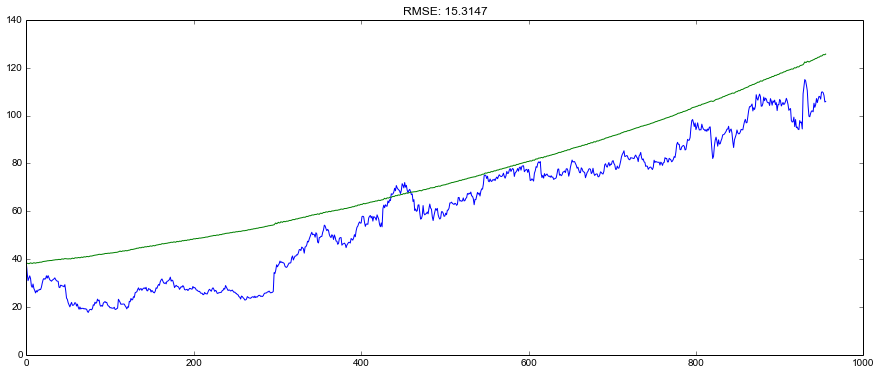

In [160]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

The code begins by taking the exponential of the variable "predictions_ARIMA_log" and stores the result in a new variable called "predictions_ARIMA". The code then uses the "plt.plot" function to plot two lines on a graph. The first line corresponds to the "ts" variable and the second line corresponds to the "predictions_ARIMA" variable. Finally, the code sets the title of the graph to display the root mean squared error (RMSE) value calculated by taking the square root of the sum of the squared differences between the "predictions_ARIMA" and "ts" variables, divided by the length of the "ts" variable. The result is displayed with a precision of four decimal places.